In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [5]:
activations = {}

activations['silu'] = lambda x: x / (1 + math.exp(-x))
activations['gelu'] = lambda x: x * 0.5 * (1 + math.erf(x / math.sqrt(2)))
activations['gelu_tanh'] = lambda x: x * 0.5 * (1 + math.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * x**3)))
activations['gelu_swish'] = lambda x: x / (1 + math.exp(-x * 1.702))

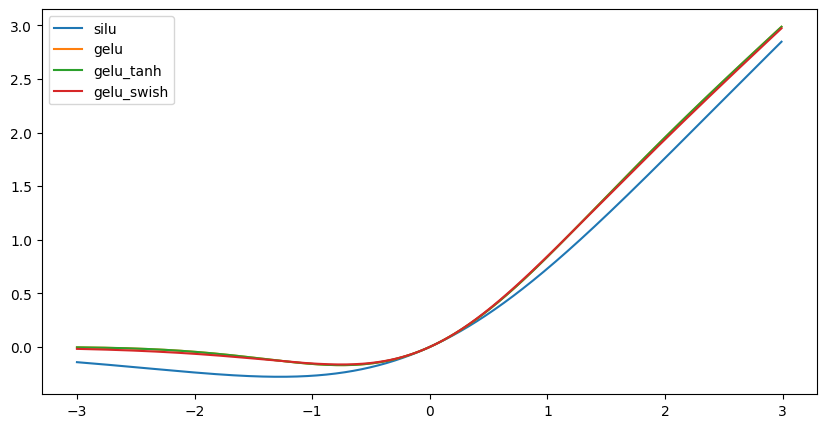

In [6]:
plt.figure(figsize=(10, 5))
x = [i / 100 for i in range(-300, 300)]
for name, activation in activations.items():
    plt.plot(x, [activation(i) for i in x], label=name)
plt.legend()
plt.show()

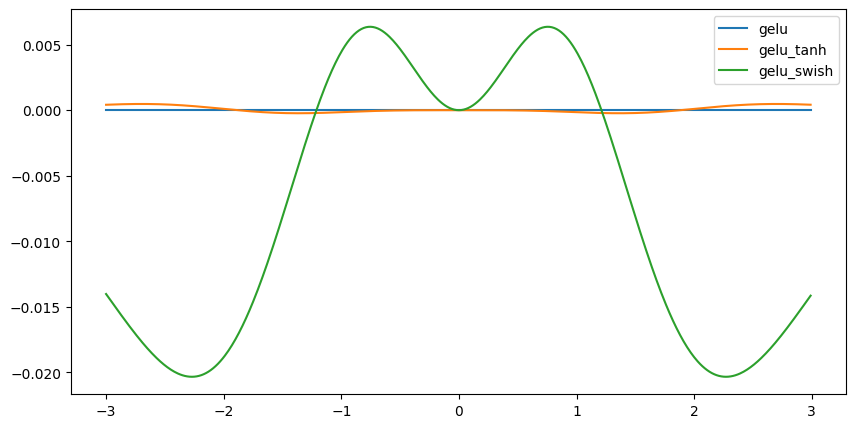

In [7]:
plt.figure(figsize=(10, 5))
x = [i / 100 for i in range(-300, 300)]
for name, activation in activations.items():
    if not name.startswith('gelu'):
        continue
    plt.plot(x, [activation(i) - activations["gelu"](i) for i in x], label=name)
plt.legend()
plt.show()


In [42]:
import torch
import torch.optim

scale = torch.tensor(1.0, requires_grad=True)
optimizer = torch.optim.AdamW([scale], lr=1e-4)

for i in range(int(1e5)):
    batch = torch.randn(4096)

    b_exact = batch * 0.5 * (1 + torch.erf(batch / math.sqrt(2)))
    b_approx = batch / (1 + torch.exp(-batch * scale))
    loss = torch.mean((b_exact - b_approx)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(loss)
print(scale)


tensor(4.8065e-05, grad_fn=<MeanBackward0>)
tensor(1.7125, requires_grad=True)
